# HR Analytics
This is an attempt to solve the [challenge](https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#ProblemStatement) offered by Analytics Vidhya. 

The programming language used is R. The following libraries have been used:
- dplyr

The task here is to identify the right people for promotion and prepare them in time.


### Reading the Data and Initial Exploration

In [1]:
data = as.data.frame(read.csv('train.csv', na.strings = "NA"))
head(data, n=5)

employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0


We can make the following observations:
- Since employee_id is unique, we do not need it for our analysis. however, we can use it to check for duplicate entries.
- The following columns are categorical:
    - department
    - education
    - gender
    - region
    - recruitment_channel
    - KPIs_met>80% (binary)
    - awards_won? (binary)
- The following columns are numerical:
    - no_of_trainings
    - age
    - previous_year_rating
    - length_of_service
    - avg_training_score
- The target variable is is_promoted   
    

### Cleaning the Data
We will now check for missing values and eliminate/impute those; then convert categorical variables to numerical/binary for our analysis.

In [2]:
sapply(data,function(x) sum(is.na(x)))

employee_id           department               region 
                   0                    0                    0 
           education               gender  recruitment_channel 
                   0                    0                    0 
     no_of_trainings                  age previous_year_rating 
                   0                    0                 4124 
   length_of_service        KPIs_met..80.          awards_won. 
                   0                    0                    0 
  avg_training_score          is_promoted 
                   0                    0

Before we eliminate/impute the missing values, let us explore to see if there might be some patterns.

In [3]:
library("dplyr")
filter(data,is.na(data$previous_year_rating))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
29934,Technology,region_23,,m,sourcing,1,30,NA,1,0,0,77,0
71177,Procurement,region_5,Bachelor's,m,other,1,27,NA,1,0,0,70,0
74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NA,1,0,0,44,0
45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NA,1,0,0,49,0
26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NA,1,1,0,47,0
9150,Analytics,region_22,Bachelor's,f,other,1,28,NA,1,1,0,80,0
77981,Finance,region_22,Bachelor's,m,other,1,27,NA,1,1,1,58,1
16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NA,1,0,0,61,1
44575,Legal,region_7,Bachelor's,m,other,1,29,NA,1,0,0,65,1
9589,Sales & Marketing,region_31,Bachelor's,f,other,1,31,NA,1,0,0,51,0


We observe that the length_of_service for all these employees is 1 (year). We can draw that these employees were not a part of the company in the previous year, and thus, do not have a previous_year_rating. We can substitute these missing entries with 0.

In [4]:
data[is.na(data)] = 0

This method is not the best suited for replacing missing values from a column, but since the identified missing values are only from a single column, this works without any errors here.

In [5]:
filter(data, (data$length_of_service == 1))

employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
29934,Technology,region_23,,m,sourcing,1,30,0,1,0,0,77,0
71177,Procurement,region_5,Bachelor's,m,other,1,27,0,1,0,0,70,0
74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,0,1,0,0,44,0
45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,0,1,0,0,49,0
26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,0,1,1,0,47,0
9150,Analytics,region_22,Bachelor's,f,other,1,28,0,1,1,0,80,0
77981,Finance,region_22,Bachelor's,m,other,1,27,0,1,1,1,58,1
16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,0,1,0,0,61,1
44575,Legal,region_7,Bachelor's,m,other,1,29,0,1,0,0,65,1
9589,Sales & Marketing,region_31,Bachelor's,f,other,1,31,0,1,0,0,51,0


While confirming the values for the pervious case, we also observe that education is missing for a few entries. However, this was not detected when we checked for missing values. This might be because the missing values are actually empty strings.

In [6]:
table(data$education)


                       Bachelor's  Below Secondary Master's & above 
            2409            36669              805            14925 

In [7]:
filter(data, (data$education == ''))

employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
29934,Technology,region_23,,m,sourcing,1,30,0,1,0,0,77,0
33332,Operations,region_15,,m,sourcing,1,41,4,11,0,0,57,0
35465,Sales & Marketing,region_7,,f,sourcing,1,24,1,2,0,0,48,0
17423,Sales & Marketing,region_2,,m,other,3,24,2,2,0,0,48,0
66013,Sales & Marketing,region_2,,m,sourcing,2,25,3,2,0,0,53,0
69094,Sales & Marketing,region_2,,m,sourcing,1,39,1,9,0,0,49,0
62658,Sales & Marketing,region_2,,f,sourcing,1,20,0,1,0,0,55,0
6254,Operations,region_2,,f,other,1,33,4,9,0,0,64,0
60761,Operations,region_16,,f,other,1,31,4,2,0,0,62,0
57235,Sales & Marketing,region_26,,m,other,1,22,4,2,0,0,51,0


Since there is no obvious relation, we fill the missing data with most common value, which is Bachelor's.

In [8]:
data$education[data$education == ""] = NA

In [9]:
table(data$education)


                       Bachelor's  Below Secondary Master's & above 
               0            36669              805            14925 

In [10]:
data$education[is.na(data$education)] = "Bachelor's"

In [11]:
table(data$education)


                       Bachelor's  Below Secondary Master's & above 
               0            39078              805            14925 

### Plotting the data
We now move on to plotting the data to understand which variables are correlated to the target variable.

- box plot age
- bin age into categories - count people promoted
- count people promoted based on gender (%)
- education/source
- total score
- rest all directly



#### Department
We start by plotting department against is_promoted to see which department has more number of promotions.

In [12]:
# create a seperate dataframe containing only department and promoted
df1 = summarize(group_by(data,department), promoted=sum(is_promoted))
df2 = data %>% group_by(department)  %>% tally()
df = merge(df1,df2,by = 'department')
df['perc'] = df['promoted']/df['n']*100
df

department,promoted,n,perc
Analytics,512,5352,9.566517
Finance,206,2536,8.123028
HR,136,2418,5.624483
Legal,53,1039,5.101059
Operations,1023,11348,9.014804
Procurement,688,7138,9.638554
R&D,69,999,6.906907
Sales & Marketing,1213,16840,7.203088
Technology,768,7138,10.759316


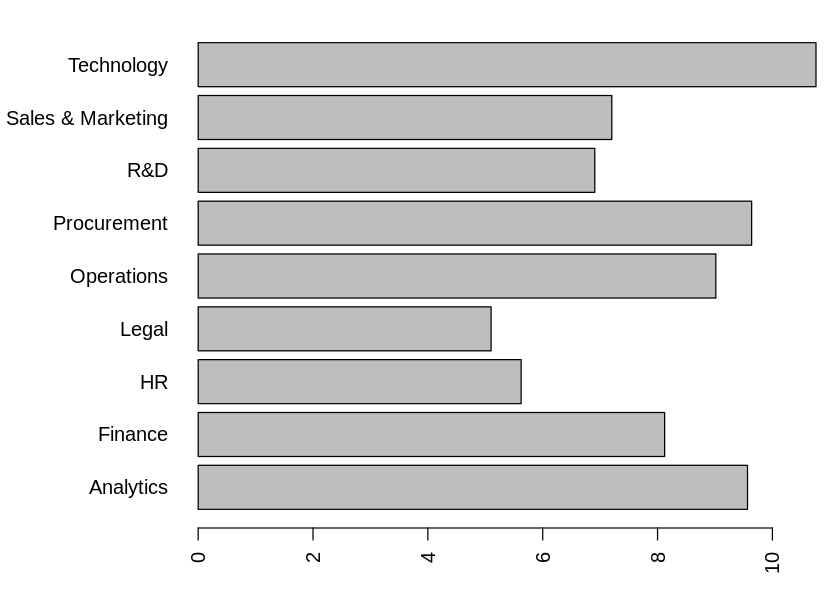

In [13]:
options(repr.plot.width=7, repr.plot.height=5)
par(mar=c(3,8,1,1))
barplot(df$perc, names.arg = df$department, las=2, horiz=TRUE)

We can see that Technology department has the most number of promotions.

#### Region
We do not analyse region as intuitively it does not make sense for region to affect the promotion of an employee.

#### Education

In [15]:
# create a seperate dataframe containing only department and promoted
df1 = summarize(group_by(data,education), promoted=sum(is_promoted))
df2 = data %>% group_by(education)  %>% tally()
df = merge(df1,df2,by = 'education')
df['perc'] = df['promoted']/df['n']*100
df

education,promoted,n,perc
Bachelor's,3130,39078,8.009622
Below Secondary,67,805,8.322981
Master's & above,1471,14925,9.855946


#### Gender

#### Recruitment channel